# Analysis of crime data in Boston
## By Royce Schultz

This dataset can be found on [Kaggle](https://www.kaggle.com/AnalyzeBoston/crimes-in-boston).


In [1]:
import pandas as pd
import os

crime_data = pd.read_csv('crime.csv', encoding="ISO-8859-1")
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [2]:
pd.set_option('display.precision',2)
crime_data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.00,319073.00,319073.00,319073.00,299074.00,299074.00
mean,2317.55,2016.56,6.61,13.12,42.21,-70.91
std,1185.29,1.00,3.27,6.29,2.16,3.49
min,111.00,2015.00,1.00,0.00,-1.00,-71.18
25%,1001.00,2016.00,4.00,9.00,42.30,-71.10
50%,2907.00,2017.00,7.00,14.00,42.33,-71.08
75%,3201.00,2017.00,9.00,18.00,42.35,-71.06
max,3831.00,2018.00,12.00,23.00,42.40,-1.00


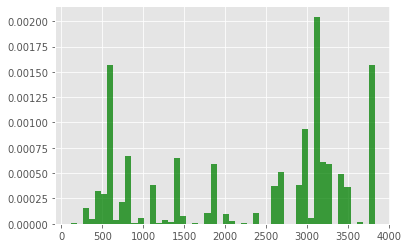

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

mu, sigma = 100, 15
data_set = mu+sigma*np.random.randn(100)

data_set = crime_data['OFFENSE_CODE'].values
n, bins, patches, = plt.hist(data_set, 50, density=1, facecolor='g', alpha=0.75)

plt.show()

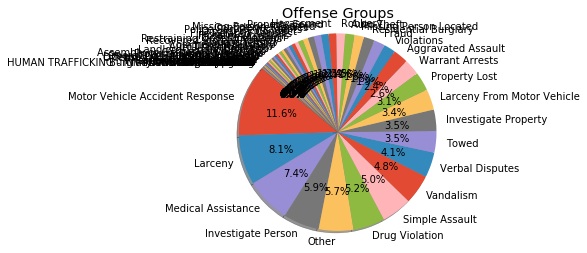

In [4]:
offense_counts = crime_data['OFFENSE_CODE_GROUP'].value_counts()

offense_codes = offense_counts.keys()
y_pos = np.arange(len(offense_codes))
counts = offense_counts.values


plt.pie(counts, labels=offense_codes,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Offense Groups')

plt.axis('equal')
plt.show()

In [6]:
motor_offenses = crime_data.loc[crime_data['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response']

print(motor_offenses['OFFENSE_CODE'].value_counts())
print(motor_offenses['DAY_OF_WEEK'].value_counts())
print(motor_offenses['MONTH'].value_counts())


3831    16323
3802     6557
3803     5131
3801     2925
3820     1656
3830     1286
3810      916
3805      766
3807      732
3811      426
3821      414
Name: OFFENSE_CODE, dtype: int64
Friday       5852
Saturday     5490
Wednesday    5251
Tuesday      5210
Thursday     5187
Monday       5119
Sunday       5023
Name: DAY_OF_WEEK, dtype: int64
8     3980
7     3841
6     3535
10    3092
9     3043
5     3030
12    2973
3     2909
1     2746
4     2738
11    2711
2     2534
Name: MONTH, dtype: int64
